Hierarchical bayes linear

In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:

np.random.seed(42)
n_schools = 50
n_students_per_school = 50


true_tau = 1 # a
true_mu = 80 # b, mean of b for all students
true_school_treatment = 4 # c 
true_student_treatment = 2 # d 
true_school_notation = 3 # e

school_effects = np.random.normal(0, true_tau,size=(n_schools,1)) # we sample 'a' values

student_scores =true_mu+school_effects@(1+np.zeros((1,n_students_per_school))) +np.random.normal( 0, 1,(n_schools,n_students_per_school)) # we sample 'b' values

school_treatment =true_school_treatment+ np.random.normal(0, 1, size=(n_schools,1))+np.reshape(np.mean(student_scores,axis=1),(n_schools,1))+school_effects # we get c values

student_treatment =np.random.normal(0,1,size=(n_schools,n_students_per_school)) + student_scores+true_student_treatment+school_treatment@(1+np.zeros((1,n_students_per_school))) # we get d values

# Calculate school notation (e) for each school
school_notation = np.random.normal(true_school_notation, 1, n_schools)+np.mean(student_treatment,axis=1) # we get e values


# Prepare data
school_id = np.repeat(range(n_schools), n_students_per_school)


In [10]:
def hierarchical_gibbs_sampler(student_scores, school_treatment, student_treatment, school_notation, n_iter=5000, burnin=1000):
    n_schools, n_students_per_school = student_scores.shape
    
    # Initialize parameters
    mu = np.mean(student_scores)
    tau = 1
    sigma = 1
    school_effects = np.zeros(n_schools)
    c = np.mean(school_treatment)
    d = np.mean(student_treatment)
    e = np.mean(school_notation)
    
    # Prepare containers for samples
    samples_mu = np.zeros(n_iter)
    samples_tau = np.zeros(n_iter)
    samples_sigma = np.zeros(n_iter)
    samples_school_effects = np.zeros((n_iter, n_schools))
    samples_c = np.zeros(n_iter)
    samples_d = np.zeros(n_iter)
    samples_e = np.zeros(n_iter)
    
    for i in range(n_iter):
        # Sample school effects
        for j in range(n_schools):
            precision = n_students_per_school / sigma**2 + 1 / tau**2
            mean = (np.sum(student_scores[j] - mu - d * student_treatment[j]) / sigma**2) / precision
            school_effects[j] = np.random.normal(mean, 1 / np.sqrt(precision))
        
        # Sample mu
        precision = np.sum(1 / sigma**2)
        mean = np.sum((student_scores - school_effects[:, np.newaxis] - d * student_treatment) / sigma**2) / precision
        mu = np.random.normal(mean, 1 / np.sqrt(precision))
        
        # Sample c (school treatment effect)
        precision = n_schools / sigma**2
        mean = np.sum((school_treatment - np.mean(student_scores, axis=1) - school_effects) / sigma**2) / precision
        c = np.random.normal(mean, 1 / np.sqrt(precision))
        
        # Sample d (student treatment effect)
        precision = np.sum(student_treatment**2) / sigma**2
        mean = np.sum(student_treatment * (student_scores - mu - school_effects[:, np.newaxis])) / (sigma**2 * precision)
        d = np.random.normal(mean, 1 / np.sqrt(precision))
        
        # Sample e (school notation)
        precision = n_schools / sigma**2
        mean = np.sum((school_notation - np.mean(student_treatment, axis=1)) / sigma**2) / precision
        e = np.random.normal(mean, 1 / np.sqrt(precision))
        
        # Sample tau
        a = n_schools / 2
        b = np.sum(school_effects**2) / 2
        tau = np.sqrt(1 / np.random.gamma(a, 1/b))
        
        # Sample sigma
        a = (n_schools * n_students_per_school) / 2
        b = np.sum((student_scores - mu - school_effects[:, np.newaxis] - d * student_treatment)**2) / 2
        sigma = np.sqrt(1 / np.random.gamma(a, 1/b))
        
        # Store samples
        samples_mu[i] = mu
        samples_tau[i] = tau
        samples_sigma[i] = sigma
        samples_school_effects[i] = school_effects
        samples_c[i] = c
        samples_d[i] = d
        samples_e[i] = e
    
    return samples_mu[burnin:], samples_tau[burnin:], samples_sigma[burnin:], samples_school_effects[burnin:], samples_c[burnin:], samples_d[burnin:], samples_e[burnin:]


In [ ]:

# Run hierarchical Gibbs sampler
samples_mu, samples_tau, samples_sigma, samples_school_effects, samples_c, samples_d, samples_e = hierarchical_gibbs_sampler(student_scores, school_treatment, student_treatment, school_notation)


In [11]:
# Print all generated arrays
print("School effects:")
print(school_effects)

print("\nStudent scores:")
print(student_scores)

print("\nSchool treatment:")
print(school_treatment)

print("\nStudent treatment:")
print(student_treatment)

print("\nSchool notation:")
print(school_notation)

print("\nSchool ID:")
print(school_id)


School effects:
[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]
 [ 1.52302986]
 [-0.23415337]
 [-0.23413696]
 [ 1.57921282]
 [ 0.76743473]
 [-0.46947439]
 [ 0.54256004]
 [-0.46341769]
 [-0.46572975]
 [ 0.24196227]
 [-1.91328024]
 [-1.72491783]
 [-0.56228753]
 [-1.01283112]
 [ 0.31424733]
 [-0.90802408]
 [-1.4123037 ]
 [ 1.46564877]
 [-0.2257763 ]
 [ 0.0675282 ]
 [-1.42474819]
 [-0.54438272]
 [ 0.11092259]
 [-1.15099358]
 [ 0.37569802]
 [-0.60063869]
 [-0.29169375]
 [-0.60170661]
 [ 1.85227818]
 [-0.01349722]
 [-1.05771093]
 [ 0.82254491]
 [-1.22084365]
 [ 0.2088636 ]
 [-1.95967012]
 [-1.32818605]
 [ 0.19686124]
 [ 0.73846658]
 [ 0.17136828]
 [-0.11564828]
 [-0.3011037 ]
 [-1.47852199]
 [-0.71984421]
 [-0.46063877]
 [ 1.05712223]
 [ 0.34361829]
 [-1.76304016]]

Student scores:
[[80.82079812 80.11163187 79.81979215 ... 80.75776943 80.50182761
  80.26212702]
 [78.44636496 79.44109038 79.51902118 ... 78.54127909 80.38367726
  80.15872037]
 [80.89818139 80.99413675 79.96766382 ... 80.80141364 

In [72]:
# Run Gibbs sampler
samples_mu, samples_tau, samples_sigma, samples_theta, samples_c, samples_d, samples_e = gibbs_sampler(school_notation, school_id, school_treatment, student_treatment)


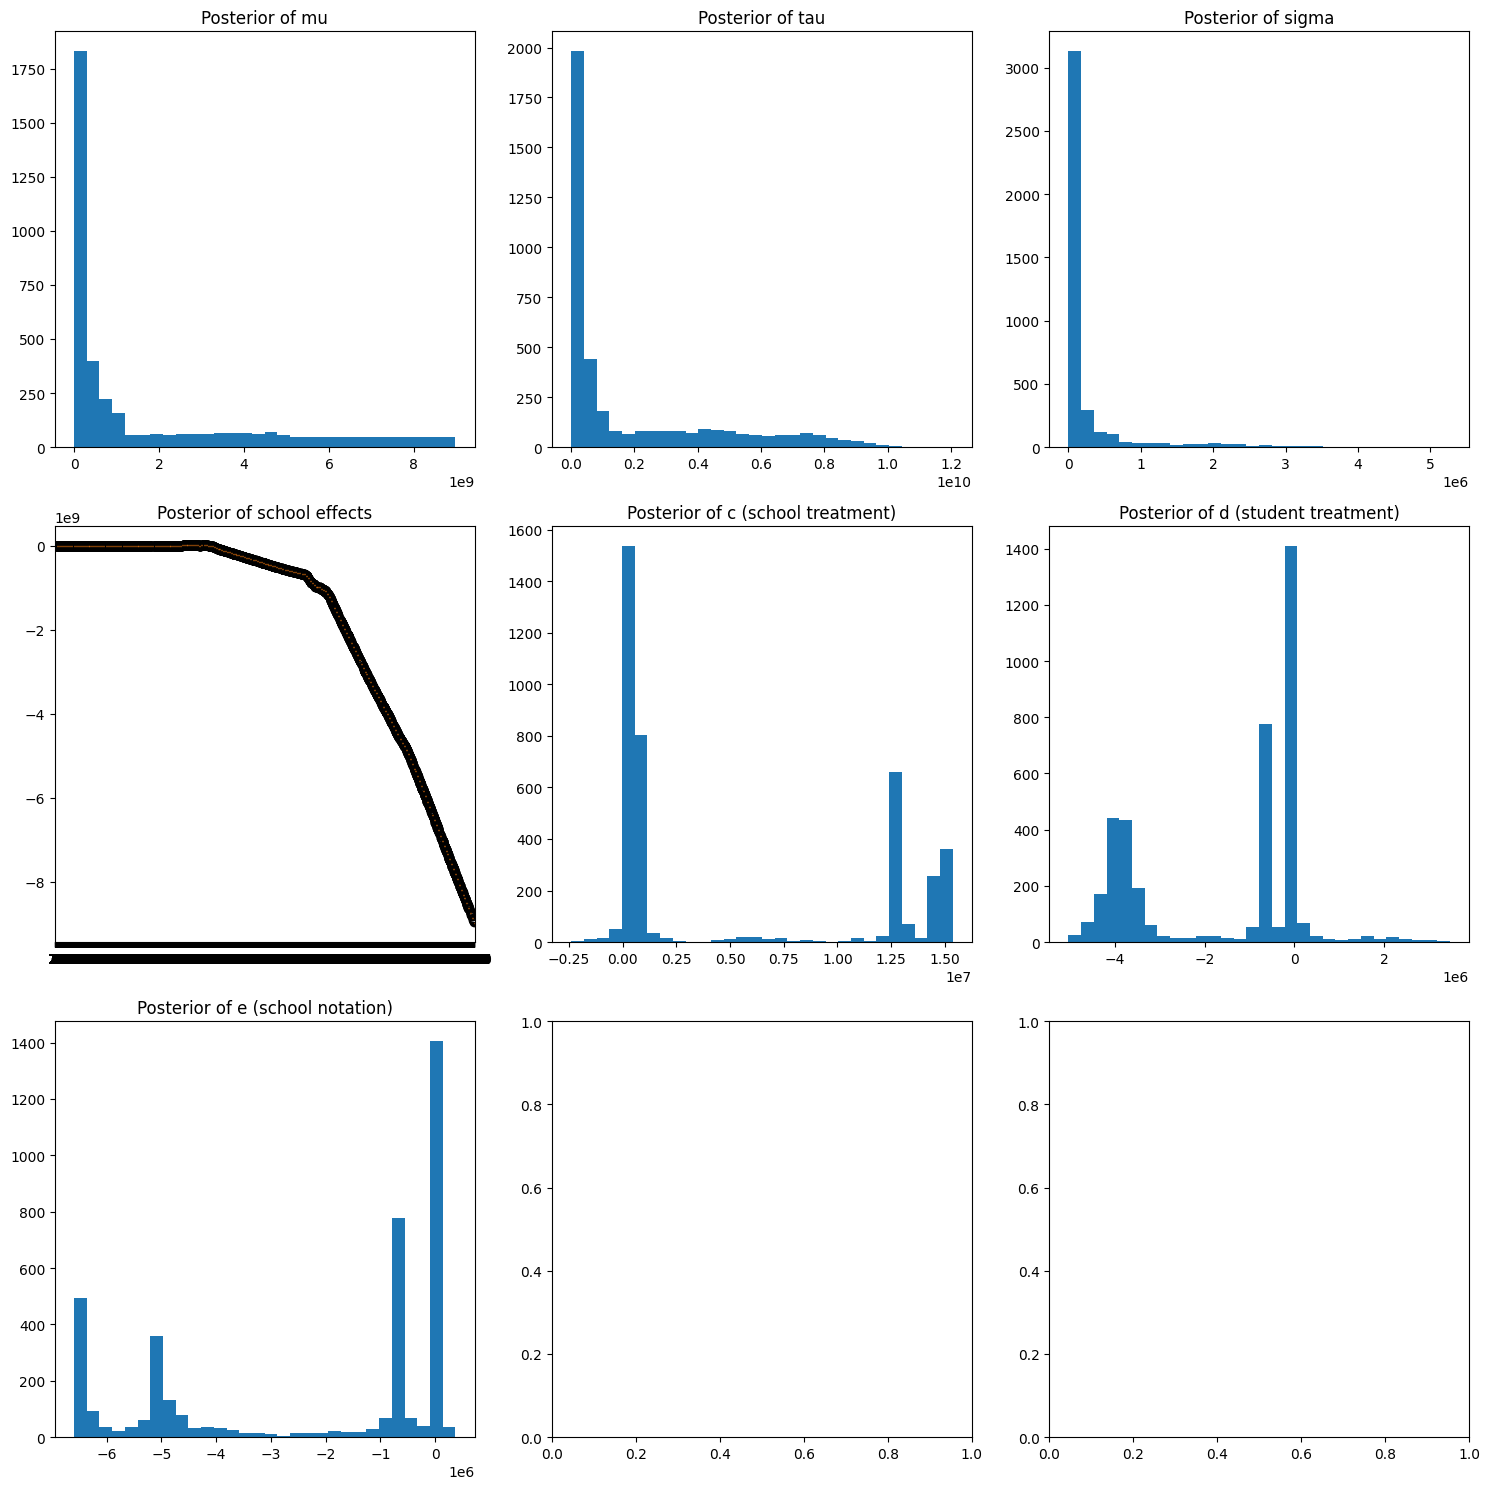

Estimated mu: 1822776135.30 (true: 80)
Estimated tau: 1853822134.22 (true: 1)
Estimated sigma: 232217.84 (true: 1)
Estimated c: 5130374.26 (true: 4)
Estimated d: -1525470.94 (true: 2)
Estimated e: -2247138.44 (true: 3)


In [73]:

# Plot results (updated to include new variables)
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs[0, 0].hist(samples_mu, bins=30)
axs[0, 0].set_title('Posterior of mu')
axs[0, 1].hist(samples_tau, bins=30)
axs[0, 1].set_title('Posterior of tau')
axs[0, 2].hist(samples_sigma, bins=30)
axs[0, 2].set_title('Posterior of sigma')
axs[1, 0].boxplot(samples_theta.T)
axs[1, 0].set_title('Posterior of school effects')
axs[1, 1].hist(samples_c, bins=30)
axs[1, 1].set_title('Posterior of c (school treatment)')
axs[1, 2].hist(samples_d, bins=30)
axs[1, 2].set_title('Posterior of d (student treatment)')
axs[2, 0].hist(samples_e, bins=30)
axs[2, 0].set_title('Posterior of e (school notation)')
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Estimated mu: {np.mean(samples_mu):.2f} (true: {true_mu})")
print(f"Estimated tau: {np.mean(samples_tau):.2f} (true: {true_tau})")
print(f"Estimated sigma: {np.mean(samples_sigma):.2f} (true: {1})")
print(f"Estimated c: {np.mean(samples_c):.2f} (true: {true_school_treatment})")
print(f"Estimated d: {np.mean(samples_d):.2f} (true: {true_student_treatment})")
print(f"Estimated e: {np.mean(samples_e):.2f} (true: {true_school_notation})")

In [12]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already generated your data as described

# Reshape the data for PyMC3
student_scores_flat = student_scores.flatten()
school_id = np.repeat(np.arange(n_schools), n_students_per_school)

with pm.Model() as hierarchical_model:
    # Hyperpriors
    mu = pm.Normal('mu', mu=80, sd=10)
    tau = pm.HalfNormal('tau', sd=5)
    sigma = pm.HalfNormal('sigma', sd=5)
    
    # School-level effects
    school_effects = pm.Normal('school_effects', mu=0, sd=tau, shape=n_schools)
    
    # Student scores
    expected_scores = mu + school_effects[school_id]
    scores = pm.Normal('scores', mu=expected_scores, sd=sigma, observed=student_scores_flat)
    
    # School treatment
    c = pm.Normal('c', mu=0, sd=5)  # school treatment effect
    school_treatment_mean = c + pm.math.mean(scores.reshape((n_schools, n_students_per_school)), axis=1) + school_effects
    school_treatment = pm.Normal('school_treatment', mu=school_treatment_mean, sd=1, observed=school_treatment)
    
    # Student treatment
    d = pm.Normal('d', mu=0, sd=5)  # student treatment effect
    student_treatment_mean = scores + d + school_treatment[school_id]
    student_treatment_flat = pm.Normal('student_treatment', mu=student_treatment_mean, sd=1, observed=student_treatment.flatten())
    
    # School notation
    e = pm.Normal('e', mu=0, sd=5)  # school notation effect
    school_notation_mean = e + pm.math.mean(student_treatment_flat.reshape((n_schools, n_students_per_school)), axis=1)
    school_notation = pm.Normal('school_notation', mu=school_notation_mean, sd=1, observed=school_notation)
    
    # Inference
    trace = pm.sample(2000, tune=1000, return_inferencedata=False)

# Plot results
pm.plot_posterior(trace, var_names=['mu', 'tau', 'sigma', 'c', 'd', 'e'])
plt.show()

# Print summary
print(pm.summary(trace, var_names=['mu', 'tau', 'sigma', 'c', 'd', 'e']))

# Compare estimated values with true values
print(f"True mu: {true_mu}, Estimated mu: {trace['mu'].mean():.2f}")
print(f"True tau: {true_tau}, Estimated tau: {trace['tau'].mean():.2f}")
print(f"True school treatment effect: {true_school_treatment}, Estimated c: {trace['c'].mean():.2f}")
print(f"True student treatment effect: {true_student_treatment}, Estimated d: {trace['d'].mean():.2f}")
print(f"True school notation effect: {true_school_notation}, Estimated e: {trace['e'].mean():.2f}")

ImportError: cannot import name 'OrderedDict' from 'collections.abc' (/usr/lib/python3.10/collections/abc.py)

bambi   

In [ ]:
import bambi as bmb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already generated your data as described

# Create a DataFrame with all the data
data = pd.DataFrame({
    'school_id': np.repeat(np.arange(n_schools), n_students_per_school),
    'student_scores': student_scores.flatten(),
    'school_treatment': np.repeat(school_treatment, n_students_per_school),
    'student_treatment': student_treatment.flatten(),
    'school_notation': np.repeat(school_notation, n_students_per_school)
})

# Create the model
model = bmb.Model('student_scores ~ 1 + school_treatment + student_treatment + (1|school_id)', data)

# Fit the model
results = model.fit(draws=2000, chains=4)

# Print summary
print(results.summary())

# Plot results
results.plot_posterior()
plt.show()

# Compare estimated values with true values
print(f"True mu: {true_mu}, Estimated Intercept: {results.posterior['Intercept'].mean().values[0]:.2f}")
print(f"True school treatment effect: {true_school_treatment}, Estimated school_treatment: {results.posterior['school_treatment'].mean().values[0]:.2f}")
print(f"True student treatment effect: {true_student_treatment}, Estimated student_treatment: {results.posterior['student_treatment'].mean().values[0]:.2f}")

LDA

In [5]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Combine all features
X = np.column_stack((
    student_scores.flatten(),
    school_treatment.repeat(n_students_per_school, axis=1).flatten(),
    student_treatment.flatten(),
    np.repeat(school_notation, n_students_per_school)
))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA
n_topics = n_schools  # We treat schools as topics
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_output = lda.fit_transform(X_scaled)

# Interpret results
school_effects_lda = lda.components_.mean(axis=1)
student_scores_lda = lda_output.mean(axis=0)

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(school_effects.flatten(), school_effects_lda)
plt.xlabel('True School Effects')
plt.ylabel('Estimated School Effects (LDA)')
plt.title('School Effects: True vs Estimated')

plt.subplot(1, 2, 2)
plt.scatter(student_scores.flatten(), student_scores_lda)
plt.xlabel('True Student Scores')
plt.ylabel('Estimated Student Scores (LDA)')
plt.title('Student Scores: True vs Estimated')

plt.tight_layout()
plt.show()

# Print some metrics
print(f"Correlation between true and estimated school effects: {np.corrcoef(school_effects.flatten(), school_effects_lda)[0, 1]:.4f}")
print(f"Correlation between true and estimated student scores: {np.corrcoef(student_scores.flatten(), student_scores_lda)[0, 1]:.4f}")



ValueError: Negative values in data passed to LatentDirichletAllocation.fit

Regressor

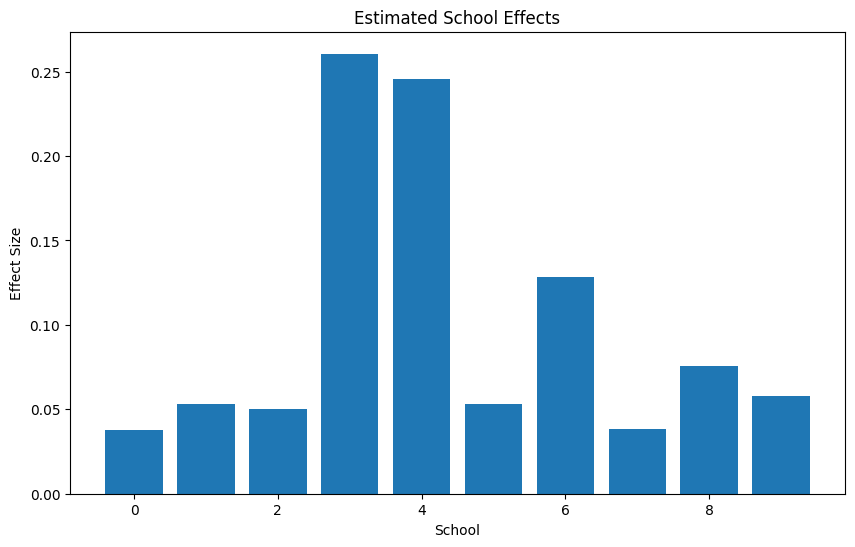

Mean squared error: 22.54
R-squared score: 0.02


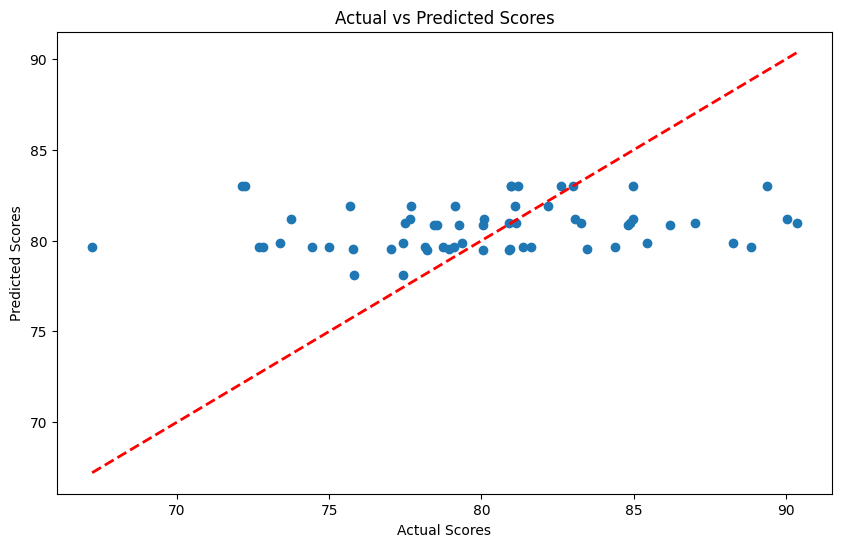

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
n_schools = 10
n_students_per_school = 30
school_effects = np.random.normal(loc=0, scale=1, size=n_schools)
student_effects = np.random.normal(loc=0, scale=1, size=n_students_per_school * n_schools)
student_scores = np.random.normal(loc=80 + school_effects.repeat(n_students_per_school) + student_effects, scale=5)

# Create a DataFrame
data = pd.DataFrame({
    'school': np.repeat(range(n_schools), n_students_per_school),
    'score': student_scores
})

# One-hot encode the school variable
X = pd.get_dummies(data['school'], prefix='school')
y = data['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate feature importances (which can be interpreted as school effects)
school_effects = rf_model.feature_importances_

# Plot school effects
plt.figure(figsize=(10, 6))
plt.bar(range(n_schools), school_effects)
plt.title('Estimated School Effects')
plt.xlabel('School')
plt.ylabel('Effect Size')
plt.show()

# Print model performance
from sklearn.metrics import mean_squared_error, r2_score
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared score: {r2_score(y_test, y_pred):.2f}")

# Plot actual vs predicted scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.52      0.53       199
           1       0.54      0.55      0.54       201

    accuracy                           0.54       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.54      0.53       400

Accuracy: 0.54


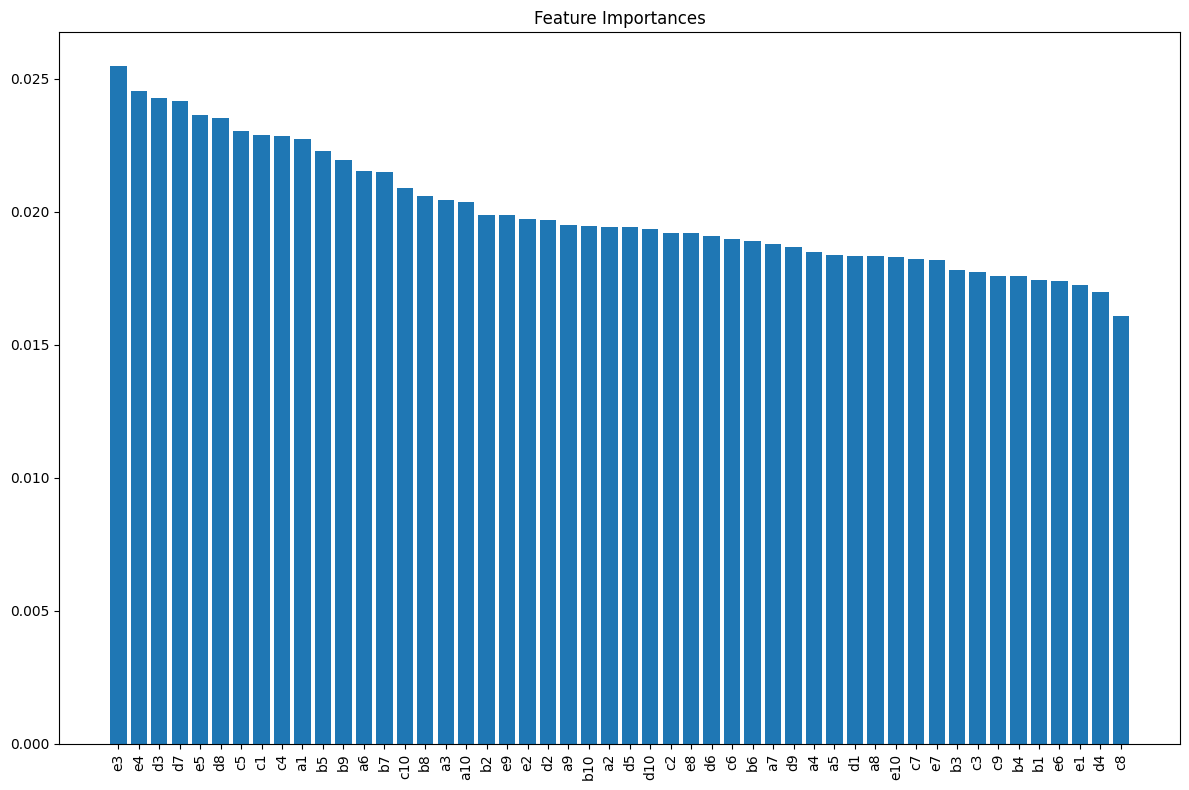

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


def create_vectors(mu, tau, sigma, theta, n_samples):
    vectors = []
    for _ in range(n_samples):
        vector = []
        for i in range(n_schools):
            # Unit node 'a'
            vector.append(np.random.normal(mu, sigma))
            # Subunit node 'b'
            vector.append(np.random.normal(mu + theta[i], sigma))
            # Unit node 'c'
            vector.append(np.random.normal(mu, sigma))
            # Subunit node 'd'
            vector.append(np.random.normal(mu + theta[i], sigma))
            # Unit node 'e'
            vector.append(np.random.normal(mu, sigma))
        vectors.append(vector)
    return np.array(vectors)


# Create vectors from original sampling
original_vectors = create_vectors(true_mu, true_tau, true_sigma, school_effects, n_samples=1000)

# Create vectors from new sampling (using posterior means)
new_vectors = create_vectors(np.mean(samples_mu), np.mean(samples_tau), np.mean(samples_sigma),
                             np.mean(samples_theta, axis=0), n_samples=1000)

# Combine datasets and create labels
X = np.vstack((original_vectors, new_vectors))
y = np.array([0] * 1000 + [1] * 1000)  # 0 for original, 1 for new

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Plot feature importances
feature_names = [f"{node}{i + 1}" for i in range(n_schools) for node in ['a', 'b', 'c', 'd', 'e']]
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()